In [1]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

array([0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0.,
       0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1.,
       0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0.,
       0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1.,
       1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0.,
       0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0.,
       1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1.,
       1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0.,
       1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1.,
       1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0.])

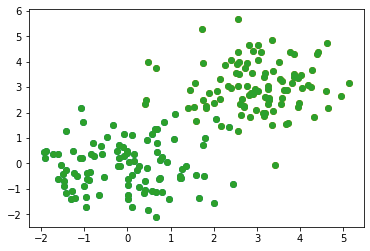

In [67]:
import numpy as np
a = np.random.randn(100,2)
b = np.random.randn(100,2)+3

import matplotlib.pyplot as plt
plt.scatter(a[:,0],a[:,1])
plt.scatter(b[:,0],b[:,1])

a = np.concatenate((a,np.zeros((100,1))),axis=1)
b = np.concatenate((b,np.zeros((100,1))+1),axis=1)

c = np.concatenate((a,b))
np.random.shuffle(c)
plt.scatter(c[:,0],c[:,1])


In [74]:
X = c[:,0:2]
y = c[:,2]
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [75]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [76]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9166666666666666


Accuracy: 0.9166666666666666


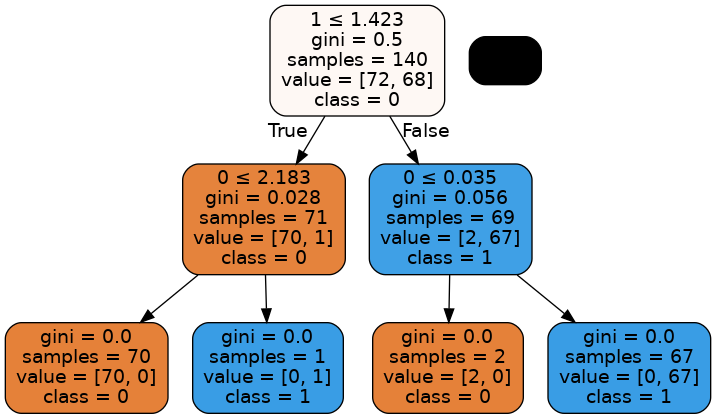

In [94]:
import pandas as pd
df = pd.DataFrame(c)
feature_cols = [0,1]
X = df[feature_cols]
y = df[2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())